<a href="https://colab.research.google.com/github/TanzeelaAgha/Assignmnets/blob/master/Cardiovascular_Disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cardio_train.csv.zip to cardio_train.csv.zip
User uploaded file "cardio_train.csv.zip" with length 738432 bytes


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import os
#print(os.listdir("../input"))

In [0]:
data=pd.read_csv("cardio_train.csv.zip")
df=data.from_csv("cardio_train.csv.zip", header=0, sep=";")
dfcol=df.columns
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


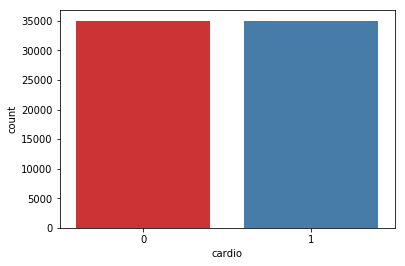

In [0]:
df[["cardio","height"]].groupby("cardio").count()
sns.countplot(x="cardio", data=df, palette="Set1")

In [0]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
dfscale=scaler.fit_transform(df)
dfscale2=pd.DataFrame(dfscale, columns=dfcol)
dfscale2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
xdf=dfscale2.iloc[:,0:11]
#xdf["gender"]=np.where(xdf["gender"]==1,"0","1") #Cambiar el 2 por 1, el 1 por 0 (por orden)
#Aca vendria un posible drop de variables xdf=xdf.drop(["gender","gluc"], axis=1)
ydf=dfscale2.iloc[:,-1]

In [0]:
x_training, x_testing, y_training, y_testing = train_test_split(xdf, ydf, test_size = 0.2, random_state=123, stratify=ydf)

In [0]:
print(xdf.shape)

(70000, 11)


In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(25, input_dim=11, activation='softsign', kernel_constraint=maxnorm(2)))
#model.add(Dropout(0))
model.add(Dense(5, activation='softsign'))
#model.add(Dropout(0))
model.add(Dense(3, activation='softsign'))
#model.add(Dropout(0))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

model.summary()

W0714 18:24:37.544860 140367067539328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 18:24:37.607490 140367067539328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 18:24:37.617674 140367067539328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 18:24:37.692025 140367067539328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 18:24:37.719362 140367067539328 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_training, y_training, epochs=50, batch_size=50, verbose=0)
score = model.evaluate(x_training, y_training)
print("\n Training Accuracy:", score[1])
score = model.evaluate(x_testing, y_testing)
print("\n Testing Accuracy:", score[1])

W0714 18:24:50.969332 140367067539328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



56000/56000 [==============================] - 1s 20us/step

 Training Accuracy: 0.6426071428571428
14000/14000 [==============================] - 0s 17us/step

 Testing Accuracy: 0.6440714285714285


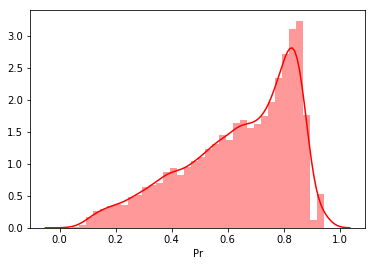

In [0]:
res=model.predict(x_testing)
res
resdf=pd.DataFrame(res, index=x_testing.index)
resdf.columns=["Pr"]
resdf["ID"]=range(14000)
resdf["y"]=np.where(resdf["Pr"]>=0.5,"1", "0")
resdf
prediction=resdf.drop(["Pr","ID"], axis=1)
predictionarray=prediction.astype(np.float)
sns.distplot(resdf["Pr"],  color="red")

In [0]:
c1=resdf[['ID','y']].groupby('y').count()
c1

,ID
y,
0,3441
1,10559


In [0]:
y_testingdf=pd.DataFrame(y_testing, index=y_testing.index)
y_testingdf["ID"]=range(14000)
y_test=y_testingdf.drop(["ID"], axis=1)
c2=y_testingdf[['ID','cardio']].groupby('cardio').count()
c2

,ID
cardio,
0.0,7004
1.0,6996


In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, predictionarray)
cm

array([[2731, 4273],
       [ 710, 6286]])

In [0]:
Accuracy=cm[0,0]/(cm[0,0]+cm[1,0])
print("The accuracy of the model is: "+ str(Accuracy*100) + " %")

The accuracy of the model is: 79.36646323743098 %


In [0]:
#INSERT DATA#
###############################################################################

day= 25 # day of bith 
month= 9 # month of bith (in numbers)
year= 1998 # year of bith
gender= 1 # 0 for women, 1 for men
height= 183 # in cm
weight= 89 # in kilograms
systolicbloodpressure= 120 # Systolic blood pressure
diastolicbloodpressure= 80 # Diastolic blood pressure
cholesterol= 1 # 1: normal, 2: above normal, 3: well above normal
gluc= 1 # 1: normal, 2: above normal, 3: well above normal
smoke= 0 # 1 if you smoke, 0 if not
alco= 0 # 1 if you drink alcohol, 0 if not
active= 1 # 1 if you do physical activity, 0 if not

##############################################################################
from datetime import date
f_date = date(year,month,day)
l_date = date.today()
delta = l_date - f_date
agedays=delta.days

agedayscale=(agedays-df["age"].min())/(df["age"].max()-df["age"].min())
heightscale=(height-df["height"].min())/(df["height"].max()-df["height"].min())
weightscale=(weight-df["weight"].min())/(df["weight"].max()-df["weight"].min())
sbpscale=(systolicbloodpressure-df["ap_hi"].min())/(df["ap_hi"].max()-df["ap_hi"].min())
dbpscale=(diastolicbloodpressure-df["ap_lo"].min())/(df["ap_lo"].max()-df["ap_lo"].min())
cholesterolscale=(cholesterol-df["cholesterol"].min())/(df["cholesterol"].max()-df["cholesterol"].min())
glucscale=(gluc-df["gluc"].min())/(df["gluc"].max()-df["gluc"].min())

single=np.array([agedayscale, gender, heightscale, weightscale, sbpscale, dbpscale, cholesterolscale, glucscale, smoke, alco, active ])
singledf=pd.DataFrame(single)
final=singledf.transpose()
final

,0,1,2,3,4,5,6,7,8,9,10
0,-0.247851,1.0,0.65641,0.415789,0.016698,0.01355,0.0,0.0,0.0,0.0,1.0
